In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

# Authenticate
client_id = '8d30d1a1b0bd4296bc36847e5805b4d8'
client_secret = '8db5a0d1682e45899677d74ffbad9651'
redirect_uri = 'http://localhost:9090/callback'

scope = "playlist-read-private"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=scope,
                                               open_browser=False))

# Get current user's playlists
playlists = sp.current_user_playlists()

playlist_data = []

for playlist in playlists['items']:
    playlist_name = playlist['name']
    playlist_id = playlist['id']

    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']

    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    for track in tracks:
        song_name = track['track']['name']
        artist_name = track['track']['artists'][0]['name']

        playlist_data.append({
            'Playlist Name': playlist_name,
            'Artist Name': artist_name,
            'Song Title': song_name
        })

# Convert to DataFrame
df = pd.DataFrame(playlist_data)

# Save Data
df.to_csv('spotify_playlist_data.csv', index=False)

print(df.head())


  Playlist Name        Artist Name        Song Title
0        lyrics          Jim Croce  Time in a Bottle
1        lyrics  The Goo Goo Dolls              Iris
2        lyrics    Alexander Rybak         Fairytale
3        lyrics            Seafret          Atlantis
4        lyrics        Linkin Park              Numb


  Playlist Name        Artist Name        Song Title
0        lyrics          Jim Croce  Time in a Bottle
1        lyrics  The Goo Goo Dolls              Iris
2        lyrics    Alexander Rybak         Fairytale
3        lyrics            Seafret          Atlantis
4        lyrics        Linkin Park              Numb
Nodes: 232 Edges: 15191


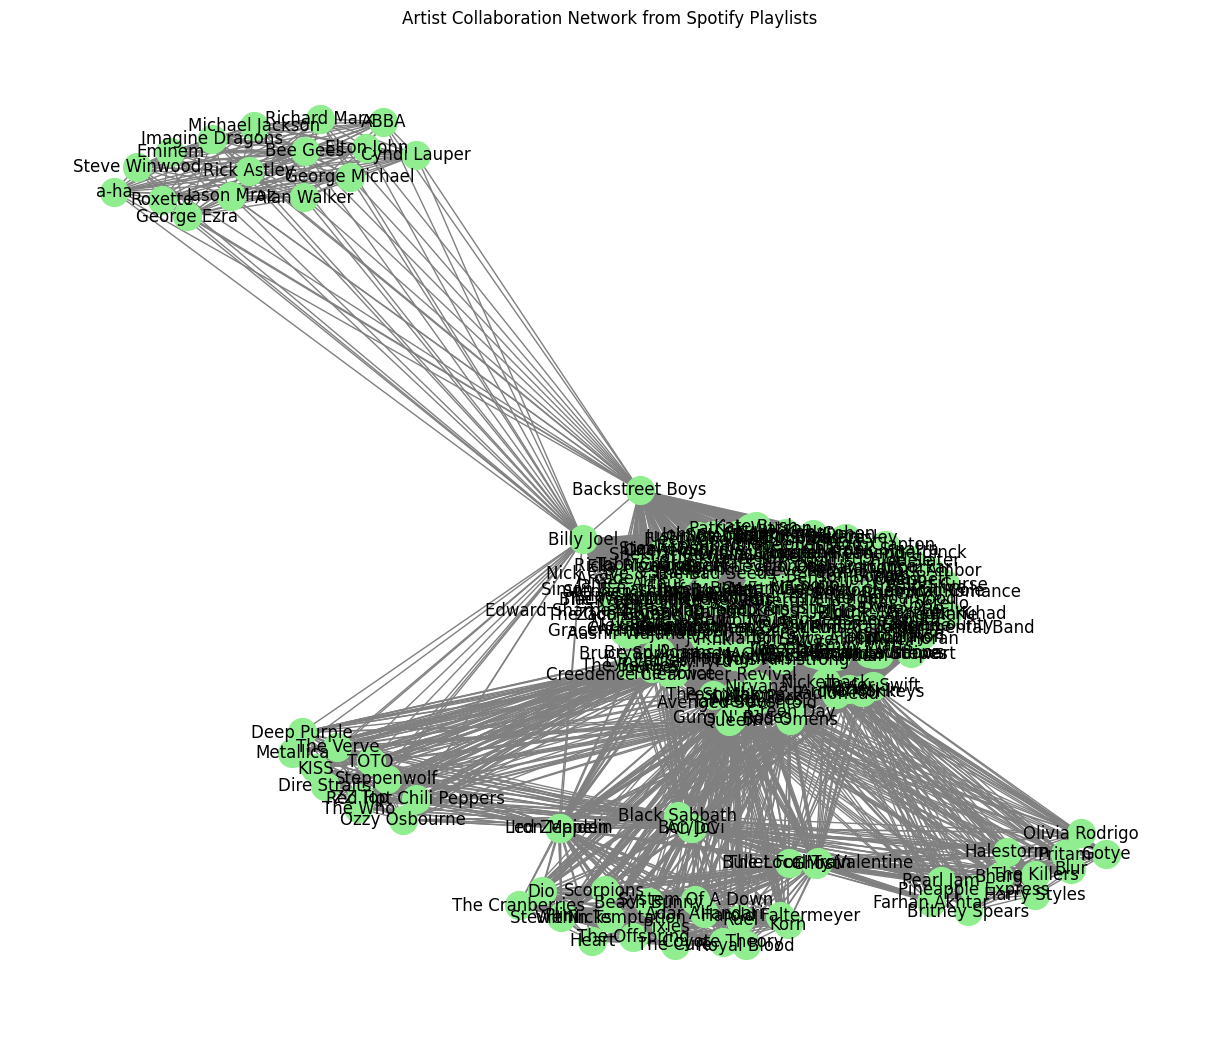

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()

# Check your data frame clearly
print(df.head())

# Construct edges carefully:
for playlist in df['Playlist Name'].unique():
    artists_in_playlist = df[df['Playlist Name'] == playlist]['Artist Name'].unique()
    for i, artist1 in enumerate(artists_in_playlist):
        for artist2 in artists_in_playlist[i+1:]:
            if G.has_edge(artist1, artist2):
                G[artist1][artist2]['weight'] += 1
            else:
                G.add_edge(artist1, artist2, weight=1)

print("Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())

# Visualize initial artist network clearly
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=400, node_color='lightgreen', edge_color='gray')
plt.title('Artist Collaboration Network from Spotify Playlists')
plt.show()

In [7]:
import networkx as nx

# Create a simplified graph clearly filtering edges with weight >= 3 (adjustable)
threshold = 2

filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= threshold]
G_filtered = nx.Graph()
G_filtered.add_edges_from(filtered_edges)

print("Filtered Nodes:", G_filtered.number_of_nodes())
print("Filtered Edges:", G_filtered.number_of_edges())

Filtered Nodes: 36
Filtered Edges: 216


Detected communities: {0, 1, 2, 3}


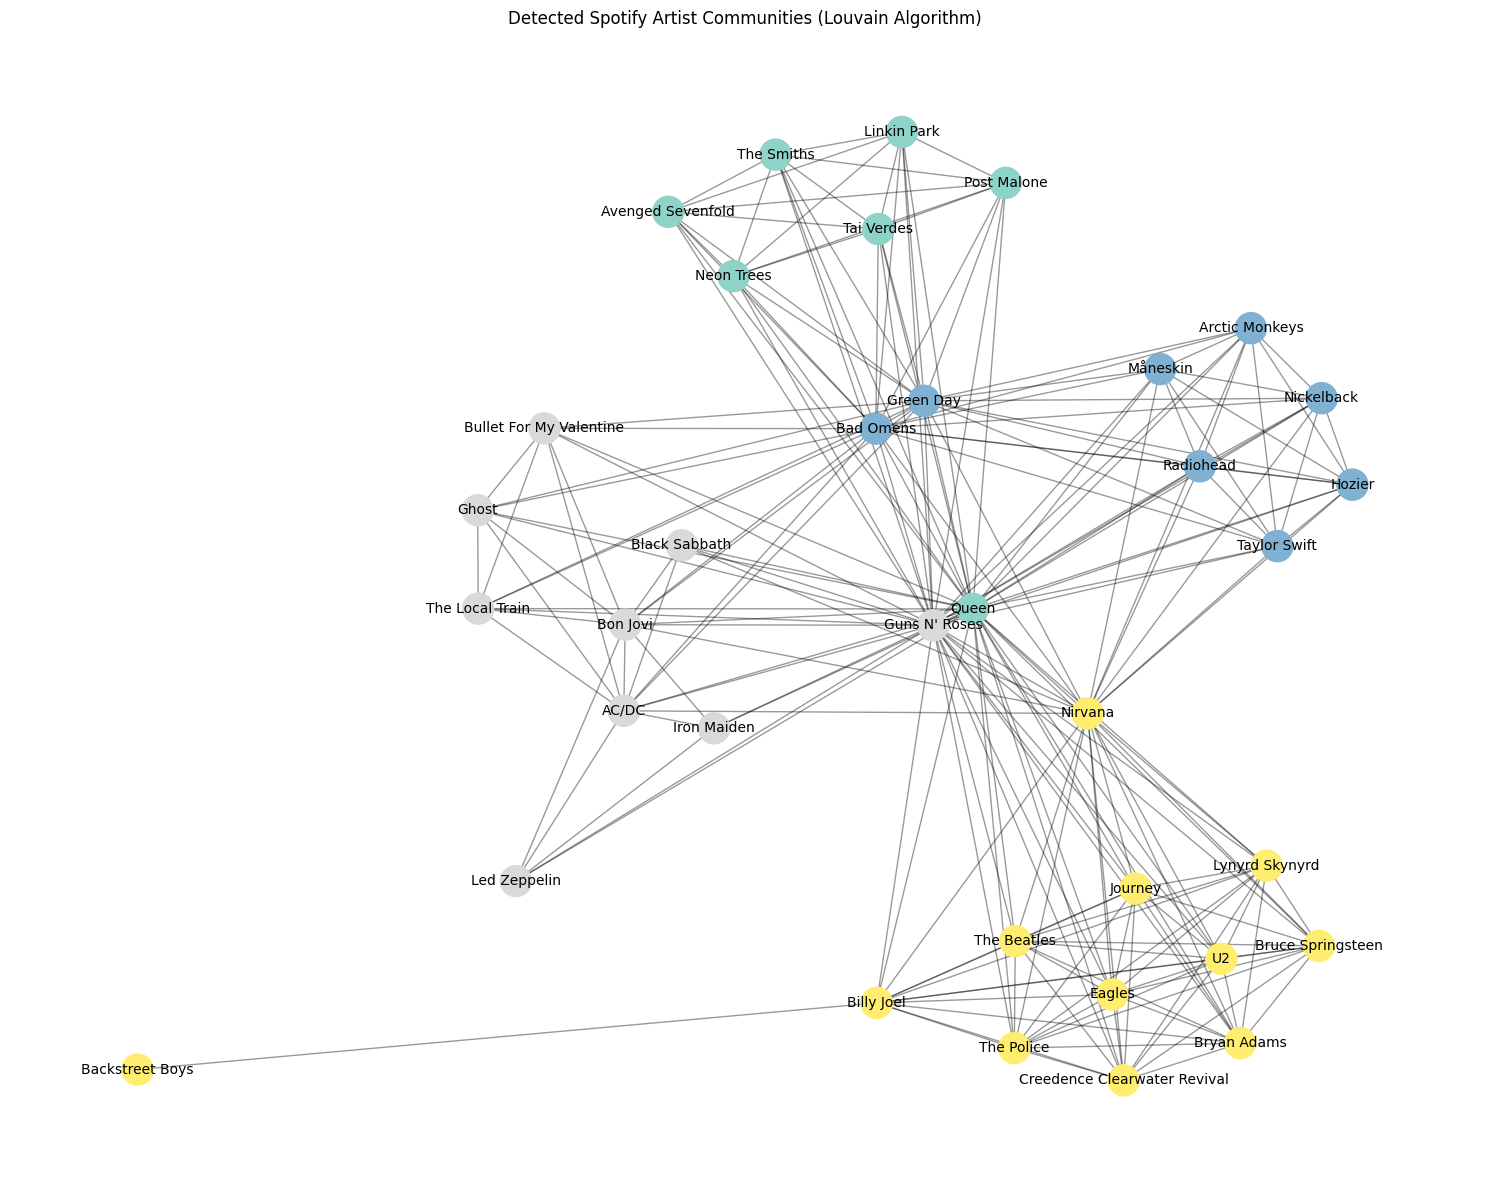

In [8]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt

# Community detection
partition = community_louvain.best_partition(G_filtered)

print("Detected communities:", set(partition.values()))

# Clearly position nodes
pos = nx.spring_layout(G_filtered, k=0.5, iterations=50, seed=42)

# Clearly plot your network
plt.figure(figsize=(15, 12))
nx.draw_networkx_nodes(G_filtered, pos, node_size=500,
                       cmap=plt.cm.Set3,
                       node_color=list(partition.values()))
nx.draw_networkx_edges(G_filtered, pos, alpha=0.4)
nx.draw_networkx_labels(G_filtered, pos, font_size=10)

plt.title("Detected Spotify Artist Communities (Louvain Algorithm)")
plt.axis('off')
plt.tight_layout()
plt.show()

Top 10 Influential Artists:
Guns N' Roses: 0.971
Queen: 0.971
Nirvana: 0.657
Bad Omens: 0.600
Green Day: 0.600
Billy Joel: 0.371
Creedence Clearwater Revival: 0.343
Lynyrd Skynyrd: 0.343
The Police: 0.343
Bryan Adams: 0.343


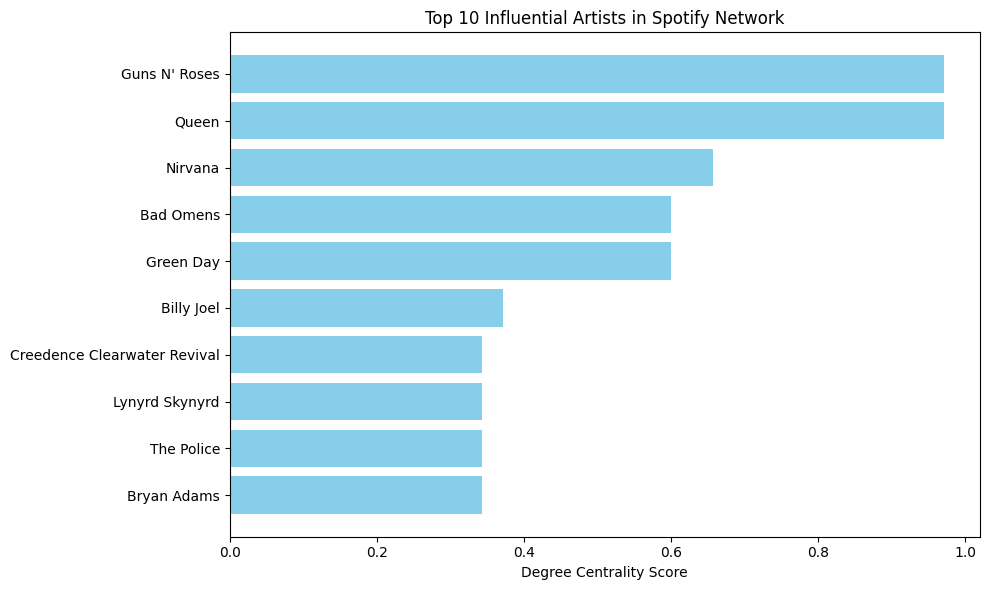

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate Degree Centrality clearly
centrality = nx.degree_centrality(G_filtered)

# Sort and identify clearly the top 10 influential artists
top_artists = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print top artists clearly
print("Top 10 Influential Artists:")
for artist, score in top_artists:
    print(f"{artist}: {score:.3f}")

# Clearly visualize top 10 influential artists
artists, scores = zip(*top_artists)

plt.figure(figsize=(10, 6))
plt.barh(artists, scores, color='skyblue')
plt.xlabel('Degree Centrality Score')
plt.title('Top 10 Influential Artists in Spotify Network')
plt.gca().invert_yaxis()  # Highest centrality clearly at the top
plt.tight_layout()
plt.show()